# <center>HACKATHON ENSTA PARIS 19 MARS 2022</center>#
#  NAMES: PANONGBENE JEAN MOHAMED SAWADOGO #
# Email: amet1900@gmail.com #
# Github: https://github.com/Panongbene #

## IMPORT lIBRARY

In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Variable

In [3]:
nameCsvFile = "data/trainingData.csv"
designationProduitDefault = "DESIGNATION_EQUIPEMENT"
anomalieValues = "ANOMALIE"

nameEncodingLienWiki = 'dataResult/encodingLienWiki'
nameEncodingDesignation = 'dataResult/encodingDesignation'
nameEncodingDesignationEquipement = 'dataResult/encodingDesignationEquipement'
nameEncodingNomenclatureProblem = 'dataResult/encodingNomenclatureProblem'

## IMPORT AND VISUALIZATION DATA

In [4]:
train_data = pd.read_csv(nameCsvFile, sep=';')

In [5]:
train_data.head(10)

,INCIDENT,STATUT,DESIGNATION,CODE_PRODUIT,DESIGNATION_PRODUIT,CODE_EQUIPEMENT,DESIGNATION_EQUIPEMENT,CODE_APP,DESIGNATION_APP,NOMENCLATURE_PROBLEME,ENONCE_PROBLEME_P,LIENWIKI,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,645525,Archivé,#MATERIEL/TELEPHONIE/CISCO WIFI,NaN,NaN,191201.0,STATION HP Z440,0.0,Sans Objet,Telephonie,description de l'incident :l'utilisateur voudr...,/wikisup/base%20de%20connaissance%20support/su...,NaN,NaN,NaN
1,646545,Archivé,#MATERIEL/TELEPHONIE/CISCO WIFI,NaN,NaN,NaN,NaN,0.0,Sans Objet,ToIP,description de l'incident :l'user signale que ...,/wikisup/base%20de%20connaissance%20support/su...,NaN,NaN,NaN
2,647182,Archivé,#ADMINISTRATION/COMPTE/DEVERROUILLAGE/OGA,NaN,NaN,217412.0,Désignation nulle,0.0,Sans Objet,Deltanet,description de l'incident:l'user veut reset md...,/wikisup/base%20de%20connaissance%20support/ré...,NaN,NaN,NaN
3,648111,Archivé,#MATERIEL/TELEPHONIE/CISCO WIFI,NaN,NaN,63171.0,LENOVO M81 STD,0.0,Sans Objet,Pb materiel,description de l'incident : utilsiateur signal...,/wikisup/base%20de%20connaissance%20support/su...,NaN,NaN,NaN
4,649658,Archivé,#MATERIEL/TELEPHONIE/CISCO WIFI/BATTERIE,416664.0,STATION HP Z420,209233.0,STATION HP Z240 TWR,0.0,Sans Objet,Pb materiel,description de l'incident :l'utilisateur nous ...,/wikisup/base%20de%20connaissance%20support/su...,NaN,NaN,NaN
5,649793,Archivé,#MATERIEL/TELEPHONIE/CISCO WIFI,NaN,NaN,213218.0,STATION HP Z420 K4000,0.0,Sans Objet,Telephonie,description de l'incident :l'utilisateur a son...,/wikisup/base%20de%20connaissance%20support/su...,NaN,NaN,NaN
6,650210,Archivé,#MATERIEL/TELEPHONIE/CISCO WIFI,NaN,NaN,169835.0,OPTIPLEX 3010SF,0.0,Sans Objet,Telephonie,description de l'incident:l'utilisateur nous a...,/wikisup/base%20de%20connaissance%20support/su...,NaN,NaN,NaN
7,652251,Archivé,#MATERIEL/TELEPHONIE/CISCO WIFI,NaN,NaN,NaN,NaN,0.0,Sans Objet,Telephonie,description de l'incident : l’utilisatrice in...,/wikisup/base%20de%20connaissance%20support/su...,NaN,NaN,NaN
8,655483,Archivé,#MATERIEL/TELEPHONIE/CISCO WIFI/BATTERIE,NaN,NaN,77476.0,LENOVO THINKCENTRE M700,0.0,Sans Objet,Telephonie,description de l'incident :l'utilisateur appel...,/wikisup/base%20de%20connaissance%20support/su...,NaN,NaN,NaN
9,655719,Archivé,#MATERIEL/TELEPHONIE/CISCO WIFI/BATTERIE,NaN,NaN,241109.0,PORTABLE LENOVO THINKPAD T460S,0.0,Sans Objet,Telephonie,description de l'incident :la batterie du télé...,/wikisup/base%20de%20connaissance%20support/su...,NaN,NaN,NaN


In [6]:
print(train_data.shape)

(31416, 15)


In [7]:
print(train_data.dtypes)

INCIDENT                    int64
STATUT                     object
DESIGNATION                object
CODE_PRODUIT              float64
DESIGNATION_PRODUIT        object
CODE_EQUIPEMENT           float64
DESIGNATION_EQUIPEMENT     object
CODE_APP                  float64
DESIGNATION_APP            object
NOMENCLATURE_PROBLEME      object
ENONCE_PROBLEME_P          object
LIENWIKI                   object
Unnamed: 12                object
Unnamed: 13                object
Unnamed: 14                object
dtype: object


###### Missing Data 

In [8]:
column_training_data=train_data.columns
column_to_delete=[]
column_uses_for_the_training=[]

for i in range(15):
    percentage=100*(train_data[train_data[column_training_data[i]].isnull()].shape[0]/train_data.shape[0])
    if(percentage >= 15):
        column_to_delete.append(column_training_data[i])
    else:
        column_uses_for_the_training.append(column_training_data[i])
    print(column_training_data[i]," = ", train_data[train_data[column_training_data[i]].isnull()].shape[0]," = ",percentage,"%train")

INCIDENT  =  0  =  0.0 %train
STATUT  =  0  =  0.0 %train
DESIGNATION  =  0  =  0.0 %train
CODE_PRODUIT  =  19304  =  61.44639674051439 %train
DESIGNATION_PRODUIT  =  19305  =  61.44957983193278 %train
CODE_EQUIPEMENT  =  3909  =  12.44270435446906 %train
DESIGNATION_EQUIPEMENT  =  4081  =  12.990196078431374 %train
CODE_APP  =  19  =  0.06047873694932518 %train
DESIGNATION_APP  =  29  =  0.09230965113318054 %train
NOMENCLATURE_PROBLEME  =  0  =  0.0 %train
ENONCE_PROBLEME_P  =  0  =  0.0 %train
LIENWIKI  =  208  =  0.6620830150241914 %train
Unnamed: 12  =  31414  =  99.99363381716323 %train
Unnamed: 13  =  31415  =  99.99681690858161 %train
Unnamed: 14  =  31415  =  99.99681690858161 %train


In [9]:
#print(train_data.LIENWIKI.value_counts())

###### Conclusion :
LIENWIKI : est le target qu'on va essayer de prédire

SCORE A UTILISER POUR LA CLASSIFICATION DE TEXTE : accurancy et f1-score

TOP1 : Le résultat est ce lien, wiki

TOP3 : le résultat est dans 3 de ces liens wiki

Colonnes à supprimer : Unnamed: 12, Unnamed: 13 , Unnamed: 14, DESIGNATION_APP, CODE_APP, CODE_EQUIPEMENT, DESIGNATION_PRODUIT, CODE_PRODUIT, INCIDENT

Colonnes à utiliser pour la prédiction : ENONCE_PROBLEME_P, NOMENCLATURE_PROBLEME, DESIGNATION_EQUIPEMENT, DESIGNATION, STATUT

LIENWIKI : Supprimer les 208 données manquantes

DESIGNATION_EQUIPEMENT: remplacer les nan par une valeur par defaut

## PREPROCESSING DATA

###### Delete useless column

In [10]:
training_data_without_useless_column = train_data[["ENONCE_PROBLEME_P", "NOMENCLATURE_PROBLEME", "DESIGNATION_EQUIPEMENT", "DESIGNATION", "LIENWIKI"]]
training_data_without_useless_column['LIENWIKI'] = training_data_without_useless_column['LIENWIKI'].replace(np.nan, anomalieValues)
training_data_without_useless_column['DESIGNATION_EQUIPEMENT'] = training_data_without_useless_column['DESIGNATION_EQUIPEMENT'].replace(np.nan, designationProduitDefault)

In [11]:
column_training_data=training_data_without_useless_column.columns
column_to_delete=[]
column_uses_for_the_training=[]

for i in range(5):
    percentage=100*(training_data_without_useless_column[training_data_without_useless_column[column_training_data[i]].isnull()].shape[0]/training_data_without_useless_column.shape[0])
    if(percentage >= 15):
        column_to_delete.append(column_training_data[i])
    else:
        column_uses_for_the_training.append(column_training_data[i])
    print(column_training_data[i]," = ", training_data_without_useless_column[training_data_without_useless_column[column_training_data[i]].isnull()].shape[0]," = ",percentage,"%train")

ENONCE_PROBLEME_P  =  0  =  0.0 %train
NOMENCLATURE_PROBLEME  =  0  =  0.0 %train
DESIGNATION_EQUIPEMENT  =  0  =  0.0 %train
DESIGNATION  =  0  =  0.0 %train
LIENWIKI  =  0  =  0.0 %train


In [12]:
train_data = pd.read_csv(nameCsvFile, sep=';')

In [13]:
training_data_without_useless_column

,ENONCE_PROBLEME_P,NOMENCLATURE_PROBLEME,DESIGNATION_EQUIPEMENT,DESIGNATION,LIENWIKI
0,description de l'incident :l'utilisateur voudr...,Telephonie,STATION HP Z440,#MATERIEL/TELEPHONIE/CISCO WIFI,/wikisup/base%20de%20connaissance%20support/su...
1,description de l'incident :l'user signale que ...,ToIP,DESIGNATION_EQUIPEMENT,#MATERIEL/TELEPHONIE/CISCO WIFI,/wikisup/base%20de%20connaissance%20support/su...
2,description de l'incident:l'user veut reset md...,Deltanet,Désignation nulle,#ADMINISTRATION/COMPTE/DEVERROUILLAGE/OGA,/wikisup/base%20de%20connaissance%20support/ré...
3,description de l'incident : utilsiateur signal...,Pb materiel,LENOVO M81 STD,#MATERIEL/TELEPHONIE/CISCO WIFI,/wikisup/base%20de%20connaissance%20support/su...
4,description de l'incident :l'utilisateur nous ...,Pb materiel,STATION HP Z240 TWR,#MATERIEL/TELEPHONIE/CISCO WIFI/BATTERIE,/wikisup/base%20de%20connaissance%20support/su...
...,...,...,...,...,...
31411,description de l'incident : le disque n de l'u...,Deconnexion,PORTABLE DELL LATITUDE 7400,Administration/Gestion des acces/Disque reseau...,/wikisup/base%20de%20connaissance%20support/di...
31412,description de l'incident : l'utilisateur a r...,Reseau,PORTABLE DELL LATITUDE 7400,Matériel/poste de travail/pc portable/ Réseau,/wikisup/base%20de%20connaissance%20support/pc...
31413,"description de la panne matérielle, réseau ou ...",Bourrage papier,Désignation nulle,Materiel/Peripherique/Imprimante Xerox/bourrag...,/wikisup/base%20de%20connaissance%20support/ge...
31414,"description de la panne matérielle, réseau ou ...",Reseau,XEROX PHASER 3330,Materiel/Peripherique/Imprimante Xerox/réseau,/wikisup/base%20de%20connaissance%20support/ge...


###### Encoding categoricial variable

## USEFULL FUNCTION

In [14]:
def preprocessing_data(input_data):
    """
        uses this function to preprocessing data
        @param input_data: data to preprocessing
        >>> result_preprocessing = preprocessing_data(train_data)
    """
  
    data_without_useless_column = input_data[["ENONCE_PROBLEME_P", "NOMENCLATURE_PROBLEME", "DESIGNATION_EQUIPEMENT", "DESIGNATION"]]
    data_without_useless_column['DESIGNATION_EQUIPEMENT'] = data_without_useless_column['DESIGNATION_EQUIPEMENT'].replace(np.nan, designationProduitDefault)
    
    
    encoding_designation = getJsonDataFromFile123(nameEncodingDesignation)
    keys_list_encoding_designation = list(encoding_designation.keys())
    values_lists_encoding_designation = list(encoding_designation.values())
    
    encoding_designation_equipement = getJsonDataFromFile123(nameEncodingDesignationEquipement)
    keys_list_encoding_designation_equipement = list(encoding_designation_equipement.keys())
    values_lists_encoding_designation_equipement = list(encoding_designation_equipement.values())
    
    encoding_nomenclature_problem = getJsonDataFromFile123(nameEncodingNomenclatureProblem)
    keys_list_encoding_nomenclature_problem = list(encoding_nomenclature_problem.keys())
    values_lists_encoding_nomenclature_problem = list(encoding_nomenclature_problem.values())

    #DESIGNATION
    data_without_useless_column["DESIGNATION_ENCODING"] = data_without_useless_column[["DESIGNATION"]]

    #DESIGNATION_EQUIPEMENT
    data_without_useless_column["DESIGNATION_EQUIPEMENT_ENCODING"] = data_without_useless_column[["DESIGNATION_EQUIPEMENT"]]

    #NOMENCLATURE_PROBLEME
    data_without_useless_column["NOMENCLATURE_PROBLEME_ENCODING"] = data_without_useless_column[["NOMENCLATURE_PROBLEME"]]


    #ENONCE_PROBLEME_P_PROCESSING
    data_without_useless_column["ENONCE_PROBLEME_P_PROCESSING"] = data_without_useless_column["ENONCE_PROBLEME_P"]


    for k in range(data_without_useless_column.shape[0]):

        data_without_useless_column["DESIGNATION_ENCODING"].iloc[k] = float(keys_list_encoding_designation[values_lists_encoding_designation.index(data_without_useless_column["DESIGNATION_ENCODING"].iloc[k])])

        data_without_useless_column["DESIGNATION_EQUIPEMENT_ENCODING"].iloc[k] = float(keys_list_encoding_designation_equipement[values_lists_encoding_designation_equipement.index(data_without_useless_column["DESIGNATION_EQUIPEMENT_ENCODING"].iloc[k])])

        data_without_useless_column["NOMENCLATURE_PROBLEME_ENCODING"].iloc[k] = float(keys_list_encoding_nomenclature_problem[values_lists_encoding_nomenclature_problem.index(data_without_useless_column["NOMENCLATURE_PROBLEME_ENCODING"].iloc[k])])
        
        data_without_useless_column["ENONCE_PROBLEME_P_PROCESSING"].iloc[k] = data_without_useless_column["ENONCE_PROBLEME_P"].iloc[k].replace("description de l'incident:", "").replace("description de l'incident :", "").replace("  *", "\n").replace("*", "").replace("lien wiki utilisé:", "").replace("lien wiki utilisé", "")
        
    data_without_useless_column = data_without_useless_column[["ENONCE_PROBLEME_P_PROCESSING", "DESIGNATION_ENCODING", "DESIGNATION_EQUIPEMENT_ENCODING", "NOMENCLATURE_PROBLEME_ENCODING"]]
    return data_without_useless_column

In [15]:
def putDataInFileJson(dataTopUpdate, nameFile):
    """
        uses this function to update file
        @param dataTopUpdate: is the datacontained
        @param nameFile: is the name of file we wante to update
    """
    nameFile = nameFile+".json"
    try:
        f = open(nameFile, "w", encoding="utf-8")
        json.dump(dataTopUpdate, f,  indent=1, ensure_ascii=False)
    except:
        print("Error Operation : save file error")
        return -1
    
    f.close()
    return "FINISH"

In [16]:
def getJsonDataFromFile123(nameFile):
    """
        use this function to get json data in the file
        @param nameFile: is the name of file we wante to update
    """
    dataToSave = dict()
    nameFile = nameFile +".json"
    
    try:
        f = open(nameFile, encoding="utf-8")
        dataToSave = json.load(f)
        f.close() 
    except:
        print("Error Operation : error open file or incorrect json format : ",nameFile)
        
    return dataToSave

In [111]:
def prediction_new_values(pipeline_model_training, input_values_to_predict):
    """
        uses this function to predict values
        param pipeline_model_training: is the model pipeline after training
        @param input_values_to_predict: is the input values to want to predict
    """
    
    data_after_preprocessing = preprocessing_data(input_values_to_predict)
    prediction_result_input = pipeline_model_training.predict(data_after_preprocessing.ENONCE_PROBLEME_P_PROCESSING.values)
    
    return prediction_result_input

## Training Modele

In [17]:
train_data = pd.read_csv(nameCsvFile, sep=';')

###### Encoding categoricial and preprocessing variables

In [18]:
encoderOrdinal = OrdinalEncoder()

training_data_without_useless_column = train_data[["ENONCE_PROBLEME_P", "NOMENCLATURE_PROBLEME", "DESIGNATION_EQUIPEMENT", "DESIGNATION", "LIENWIKI"]]
training_data_without_useless_column['LIENWIKI'] = training_data_without_useless_column['LIENWIKI'].replace(np.nan, anomalieValues)
training_data_without_useless_column['DESIGNATION_EQUIPEMENT'] = training_data_without_useless_column['DESIGNATION_EQUIPEMENT'].replace(np.nan, designationProduitDefault)

#LIENWIKI
training_data_without_useless_column["LIENWIKI_ENCODING"] = encoderOrdinal.fit_transform(training_data_without_useless_column[["LIENWIKI"]])

#DESIGNATION
training_data_without_useless_column["DESIGNATION_ENCODING"] = encoderOrdinal.fit_transform(training_data_without_useless_column[["DESIGNATION"]])

#DESIGNATION_EQUIPEMENT
training_data_without_useless_column["DESIGNATION_EQUIPEMENT_ENCODING"] = encoderOrdinal.fit_transform(training_data_without_useless_column[["DESIGNATION_EQUIPEMENT"]])

#NOMENCLATURE_PROBLEME
training_data_without_useless_column["NOMENCLATURE_PROBLEME_ENCODING"] = encoderOrdinal.fit_transform(training_data_without_useless_column[["NOMENCLATURE_PROBLEME"]])

#ENONCE_PROBLEME_P_PROCESSING
training_data_without_useless_column["ENONCE_PROBLEME_P_PROCESSING"] = training_data_without_useless_column["ENONCE_PROBLEME_P"]

encoding_lien_wiki = dict()
encoding_designation = dict()
encoding_designation_equipement = dict()
encoding_nomenclature_problem = dict()

for k in range(training_data_without_useless_column.shape[0]):
    encoding_lien_wiki[str(int(training_data_without_useless_column["LIENWIKI_ENCODING"].iloc[k]))] = training_data_without_useless_column["LIENWIKI"].iloc[k]
    training_data_without_useless_column["LIENWIKI_ENCODING"].iloc[k] = int(training_data_without_useless_column["LIENWIKI_ENCODING"].iloc[k])
    
    encoding_designation[str(int(training_data_without_useless_column["DESIGNATION_ENCODING"].iloc[k]))] = training_data_without_useless_column["DESIGNATION"].iloc[k]
    training_data_without_useless_column["DESIGNATION_ENCODING"].iloc[k] = int(training_data_without_useless_column["DESIGNATION_ENCODING"].iloc[k])
    
    encoding_designation_equipement[str(int(training_data_without_useless_column["DESIGNATION_EQUIPEMENT_ENCODING"].iloc[k]))] = training_data_without_useless_column["DESIGNATION_EQUIPEMENT"].iloc[k]
    training_data_without_useless_column["DESIGNATION_EQUIPEMENT_ENCODING"].iloc[k] = int(training_data_without_useless_column["DESIGNATION_EQUIPEMENT_ENCODING"].iloc[k])
    
    encoding_nomenclature_problem[str(int(training_data_without_useless_column["NOMENCLATURE_PROBLEME_ENCODING"].iloc[k]))] = training_data_without_useless_column["NOMENCLATURE_PROBLEME"].iloc[k]
    training_data_without_useless_column["NOMENCLATURE_PROBLEME_ENCODING"].iloc[k] = int(training_data_without_useless_column["NOMENCLATURE_PROBLEME_ENCODING"].iloc[k])
    
    training_data_without_useless_column["ENONCE_PROBLEME_P_PROCESSING"].iloc[k] = training_data_without_useless_column["ENONCE_PROBLEME_P"].iloc[k].replace("description de l'incident:", "").replace("description de l'incident :", "").replace("  *", "\n").replace("*", "").replace("lien wiki utilisé:", "").replace("lien wiki utilisé", "")
    
putDataInFileJson(encoding_lien_wiki, nameEncodingLienWiki)
putDataInFileJson(encoding_designation, nameEncodingDesignation)
putDataInFileJson(encoding_designation_equipement, nameEncodingDesignationEquipement)
putDataInFileJson(encoding_nomenclature_problem, nameEncodingNomenclatureProblem)

'FINISH'

In [19]:
training_data_result_preprocessing = training_data_without_useless_column[["ENONCE_PROBLEME_P_PROCESSING", "DESIGNATION_ENCODING", "DESIGNATION_EQUIPEMENT_ENCODING", "NOMENCLATURE_PROBLEME_ENCODING", "LIENWIKI_ENCODING"]]

In [20]:
training_data_result_preprocessing

,ENONCE_PROBLEME_P_PROCESSING,DESIGNATION_ENCODING,DESIGNATION_EQUIPEMENT_ENCODING,NOMENCLATURE_PROBLEME_ENCODING,LIENWIKI_ENCODING
0,l'utilisateur voudrais faire remplacer son tél...,757.0,91.0,184.0,27.0
1,l'user signale que le micro de son téléphone c...,757.0,13.0,185.0,27.0
2,l'user veut reset mdp deltanet \n tests/ actio...,246.0,17.0,52.0,22.0
3,utilsiateur signal que plus personne ne l'ent...,757.0,32.0,132.0,27.0
4,l'utilisateur nous appelle car son cisco wifi ...,759.0,86.0,132.0,27.0
...,...,...,...,...,...
31411,le disque n de l'utilisateur a été déconnecté...,1225.0,49.0,48.0,4.0
31412,l'utilisateur a remarqué qu'il n'y a plus de...,2090.0,49.0,159.0,16.0
31413,"description de la panne matérielle, réseau ou ...",1890.0,17.0,27.0,7.0
31414,"description de la panne matérielle, réseau ou ...",1906.0,115.0,159.0,7.0


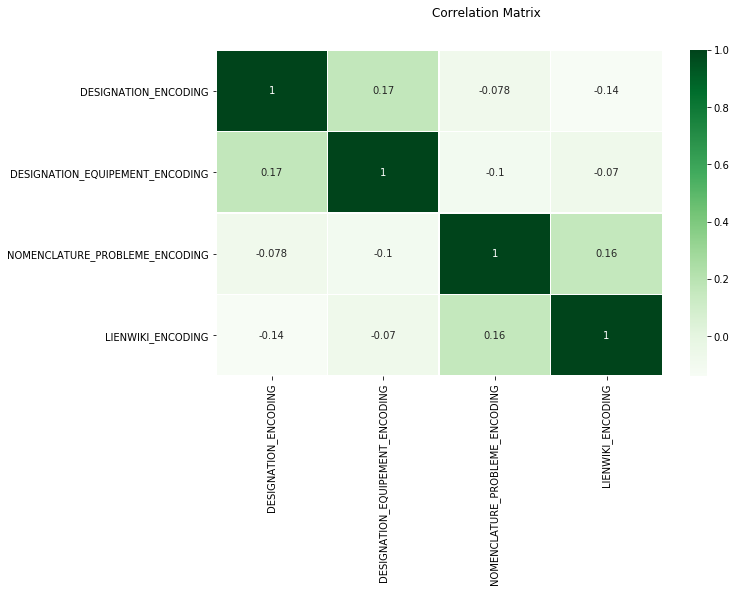

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Correlation Matrix')
sns.heatmap(training_data_result_preprocessing.corr(), annot=True, cmap="Greens", linewidths=.5, ax=ax);

### Sawadogo To Delete

In [202]:
# importing libraries
import tensorflow as tf
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import text, sequence
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, SimpleRNN, Embedding, Dropout, SpatialDropout1D, Activation, Conv1D,GRU
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, Add, Flatten
from keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D, concatenate, SpatialDropout1D
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from sklearn.model_selection  import train_test_split
#from sklearn.cross_validation import train_test_split


# For custom metrics
import keras.backend as K
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping 


import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt

plt.style.use('seaborn')

import seaborn as sns
from IPython.display import Image

from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
import os, re, csv, math, codecs
from nltk.tokenize import word_tokenize
import string
#import gensim
import os
import re

sns.set_style("whitegrid")
np.random.seed(0)

#import plotly.plotly as py
#import plotly.graph_objs as go
#import plotly
#plotly.tools.set_credentials_file(username='hamzasharoon', api_key='9le0c8M5GUNRAKyJoIt2')


# Install dependencies
#!apt install graphviz
#!pip install pydot pydot-ng
#!echo "Double check with Python 3"
#!python -c "import pydot"

In [203]:
early = EarlyStopping(monitor="val_loss", mode="min", patience=4)

In [204]:
training_data_result_preprocessing = training_data_without_useless_column[["ENONCE_PROBLEME_P_PROCESSING", "DESIGNATION_ENCODING", "DESIGNATION_EQUIPEMENT_ENCODING", "NOMENCLATURE_PROBLEME_ENCODING", "LIENWIKI_ENCODING"]]

In [205]:
one_hote_processing = pd.get_dummies(training_data_without_useless_column.LIENWIKI_ENCODING)
one_hote_processing['ENONCE_PROBLEME_P_PROCESSING'] = training_data_without_useless_column["ENONCE_PROBLEME_P_PROCESSING"]

In [206]:
one_hote_processing

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,ENONCE_PROBLEME_P_PROCESSING
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,l'utilisateur voudrais faire remplacer son tél...
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,l'user signale que le micro de son téléphone c...
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,l'user veut reset mdp deltanet \n tests/ actio...
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,utilsiateur signal que plus personne ne l'ent...
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,l'utilisateur nous appelle car son cisco wifi ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31411,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,le disque n de l'utilisateur a été déconnecté...
31412,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,l'utilisateur a remarqué qu'il n'y a plus de...
31413,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,"description de la panne matérielle, réseau ou ..."
31414,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,"description de la panne matérielle, réseau ou ..."


In [207]:
X_train, X_val, y_train, y_val = train_test_split(one_hote_processing["ENONCE_PROBLEME_P_PROCESSING"],
                                                  one_hote_processing.loc[:, one_hote_processing.columns != 'ENONCE_PROBLEME_P_PROCESSING'],
                                                  test_size=0.15, random_state=42)

In [208]:
X_train = X_train.values
X_test  = X_val.values

y_train = y_train.values
y_test  = y_val.values

In [209]:
num_words = 20000
max_features = 200000
max_len = 200 
embedding_dims = 128
num_epochs = 15
val_split = 0.1
batch_size2 = 256

In [210]:
#toxic comments Tokenization
tokenizer = tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(list(X_train))

#Convert tokenized toxic commnent to sequnces
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
 
# padding the sequences
X_train = sequence.pad_sequences(X_train, max_len)
X_test  = sequence.pad_sequences(X_test,  max_len)

print('X_train shape:', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape: (26703, 200)
X_test shape:  (4713, 200)


In [211]:
X_tra, X_val, y_tra, y_val = train_test_split(X_train, y_train, train_size =0.9, random_state=233)

In [220]:
#Import necessary libraries
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


def precision(y_true, y_pred):
    '''Calculates the precision, a metric for multi-label classification of
    how many selected items are relevant.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    '''Calculates the recall, a metric for multi-label classification of
    how many relevant items are selected.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

#Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

def fbeta_score(y_true, y_pred, beta=1):
    '''Calculates the F score, the weighted harmonic mean of precision and recall.
    This is useful for multi-label classification, where input samples can be
    classified as sets of labels. By only using accuracy (precision) a model
    would achieve a perfect score by simply assigning every class to every
    input. In order to avoid this, a metric should penalize incorrect class
    assignments as well (recall). The F-beta score (ranged from 0.0 to 1.0)
    computes this, as a weighted mean of the proportion of correct class
    assignments vs. the proportion of incorrect class assignments.
    With beta = 1, this is equivalent to a F-measure. With beta < 1, assigning
    correct classes becomes more important, and with beta > 1 the metric is
    instead weighted towards penalizing incorrect class assignments.
    '''
    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')
        
    # If there are no true positives, fix the F score at 0 like sklearn.
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score

def auroc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc


def fmeasure(y_true, y_pred):
    '''Calculates the f-measure, the harmonic mean of precision and recall.
    '''
    return fbeta_score(y_true, y_pred, beta=1)


fscore = f1score = fmeasure

In [221]:
glove_file = open('dataResult/glove.6B.100d.txt', encoding="utf8")
embeddings_index = dict()
for line in glove_file:
    val = line.split(' ')
    word = val[0]
    coefs = np.asarray(val[1:], dtype='float32')
    embeddings_index[word] = coefs
glove_file.close()

print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [222]:
embedding_matrix = np.zeros((len(tokenizer.word_index)+1, 100))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [223]:
CNN_Glove_model = Sequential([
    Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len, output_dim=embedding_matrix.shape[1],weights=[embedding_matrix], trainable=False),
    SpatialDropout1D(0.5),
    # ... 100 filters with a kernel size of 4 so that each convolution will consider a window of 4 word embeddings
    Conv1D(filters=100, kernel_size=4, padding='same', activation='relu'),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    #It will be added after the activation function between a convolutional and a max-pooling layer.
    BatchNormalization(),
    GlobalMaxPool1D(),
    Dropout(0.5),
    Dense(50, activation = 'relu'),
    Dense(31, activation = 'sigmoid')
])

In [224]:
CNN_Glove_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, fmeasure, precision, auroc, recall])

In [225]:
CNN_Glove_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 200, 100)          1927300   
                                                                 
 spatial_dropout1d_7 (Spatia  (None, 200, 100)         0         
 lDropout1D)                                                     
                                                                 
 conv1d_7 (Conv1D)           (None, 200, 100)          40100     
                                                                 
 batch_normalization_7 (Batc  (None, 200, 100)         400       
 hNormalization)                                                 
                                                                 
 global_max_pooling1d_7 (Glo  (None, 100)              0         
 balMaxPooling1D)                                                
                                                      

In [226]:
CNN_Glove_model_fit = CNN_Glove_model.fit(X_tra, y_tra*1.0, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val*1.0), callbacks=[early])

Epoch 1/15


TypeError: in user code:

    File "/home/panongbene/anaconda3/lib/python3.7/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "<ipython-input-212-b70f939baf06>", line 71, in fmeasure  *
        return fbeta_score(y_true, y_pred, beta=1)
    File "<ipython-input-212-b70f939baf06>", line 53, in fbeta_score  *
        if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:

    TypeError: 'retval_' has dtype int32 in the main branch, but dtype float32 in the else branch


#### Text Encoder

###### Tf IDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, confusion_matrix, \
multilabel_confusion_matrix, classification_report

from sklearn.pipeline import Pipeline

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from xgboost import XGBClassifier

In [185]:
X_train, X_val, y_train, y_val = train_test_split(training_data_result_preprocessing["ENONCE_PROBLEME_P_PROCESSING"],
                                                  training_data_result_preprocessing["LIENWIKI_ENCODING"],
                                                  test_size=0.15, random_state=42)

In [354]:
logistic_regression_pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords.words('french'), ngram_range=(1, 2))),
                       ('nb_model', OneVsRestClassifier(XGBClassifier(learning_rate =0.05, n_estimators=200, nthread=4)))])

In [355]:
logistic_regression_pipeline.fit(X_train.values, y_train.values)

[01:07:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:08:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:08:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:08:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['au', 'aux', 'avec', 'ce', 'ces',
                                             'dans', 'de', 'des', 'du', 'elle...
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimato

In [356]:
prediction_result = logistic_regression_pipeline.predict(X_val.values)

In [357]:
#pred_proba = logistic_regression_pipeline.predict_proba(y_train.values)

In [358]:
#print('roc_auc: ', roc_auc_score(y_val.values, pred_proba))
print('accuracy: ', accuracy_score(y_val.values, prediction_result))
print("f1 Score weighted : ",f1_score(y_val.values, prediction_result, average='weighted'))
print("f1 Score micro : ",f1_score(y_val.values, prediction_result, average='micro'))
print("f1 Score macro : ",f1_score(y_val.values, prediction_result, average='macro'))

print('confusion matrices: ')
print(multilabel_confusion_matrix(y_val.values, prediction_result))
print('classification_report: ')
print(classification_report(y_val.values, prediction_result))

accuracy:  0.9170379800551666
f1 Score weighted :  0.9163388982571228
f1 Score micro :  0.9170379800551666
f1 Score macro :  0.8846866797139792
confusion matrices: 
[[[4571    7]
  [  13  122]]

 [[4626    0]
  [   3   84]]

 [[4643    1]
  [  11   58]]

 [[4390   12]
  [  15  296]]

 [[4409    3]
  [   5  296]]

 [[4565    0]
  [   0  148]]

 [[4444    3]
  [   1  265]]

 [[4538   17]
  [  13  145]]

 [[4631   21]
  [  30   31]]

 [[4559   31]
  [  32   91]]

 [[4450   28]
  [  34  201]]

 [[4576   13]
  [  17  107]]

 [[4510   21]
  [   9  173]]

 [[4566    6]
  [   6  135]]

 [[4602   15]
  [   8   88]]

 [[4566   28]
  [   9  110]]

 [[4424   64]
  [  36  189]]

 [[4513   19]
  [  40  141]]

 [[4587   12]
  [  10  104]]

 [[4627    1]
  [   0   85]]

 [[4635    3]
  [   1   74]]

 [[4444    1]
  [   1  267]]

 [[4502    7]
  [   5  199]]

 [[4393    3]
  [   4  313]]

 [[4601   15]
  [   8   89]]

 [[4629    8]
  [  24   52]]

 [[4592   13]
  [  10   98]]

 [[4636    5]
  [   4   6

###### Bag of Word

In [133]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
#vectorizer.fit(X_train.values)

In [134]:
#X_bag_of_words = vectorizer.transform(X_train.values)

In [221]:
logistic_regression_pipeline = Pipeline([('bagofword', CountVectorizer(stop_words=stopwords.words('french'), ngram_range=(1, 2))),
                       ('nb_model', XGBClassifier(learning_rate =0.2, n_estimators=251, objective='multi:softmax', num_class=31, nthread=4))])

In [222]:
logistic_regression_pipeline.fit(X_train.values, y_train.values)

[11:05:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(memory=None,
         steps=[('bagofword',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=['au', 'aux', 'avec', 'ce', 'ces',
                                             'dans', 'de', 'des', 'du', 'elle',
                                             'en', 'et', 'eux', 'il', '...
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=251,
                      

In [223]:
prediction_result = logistic_regression_pipeline.predict(X_val.values)

In [224]:
#print('roc_auc: ', roc_auc_score(y_val.values, pred_proba))
print('accuracy: ', accuracy_score(y_val.values, prediction_result))
print("f1 Score weighted : ",f1_score(y_val.values, prediction_result, average='weighted'))
print("f1 Score micro : ",f1_score(y_val.values, prediction_result, average='micro'))
print("f1 Score macro : ",f1_score(y_val.values, prediction_result, average='macro'))

print('confusion matrices: ')
print(multilabel_confusion_matrix(y_val.values, prediction_result))
print('classification_report: ')
print(classification_report(y_val.values, prediction_result))

accuracy:  0.9253129641417356
f1 Score weighted :  0.9243911551205269
f1 Score micro :  0.9253129641417356
f1 Score macro :  0.8926958246725182
confusion matrices: 
[[[4571    7]
  [  10  125]]

 [[4625    1]
  [   2   85]]

 [[4643    1]
  [   8   61]]

 [[4389   13]
  [  13  298]]

 [[4410    2]
  [   6  295]]

 [[4565    0]
  [   0  148]]

 [[4444    3]
  [   3  263]]

 [[4541   14]
  [  12  146]]

 [[4630   22]
  [  29   32]]

 [[4560   30]
  [  33   90]]

 [[4452   26]
  [  34  201]]

 [[4576   13]
  [  13  111]]

 [[4516   15]
  [   7  175]]

 [[4567    5]
  [   8  133]]

 [[4604   13]
  [   7   89]]

 [[4577   17]
  [   9  110]]

 [[4436   52]
  [  28  197]]

 [[4506   26]
  [  32  149]]

 [[4588   11]
  [  12  102]]

 [[4628    0]
  [   0   85]]

 [[4634    4]
  [   0   75]]

 [[4443    2]
  [   0  268]]

 [[4502    7]
  [   4  200]]

 [[4392    4]
  [   4  313]]

 [[4604   12]
  [   6   91]]

 [[4628    9]
  [  18   58]]

 [[4596    9]
  [   8  100]]

 [[4635    6]
  [   4   6

In [229]:
predict_proba_result = logistic_regression_pipeline.predict_proba(X_val.values)
#prediction_result

In [233]:
labels = [k for k in range(31)]

In [236]:
def plot_roc_curve(test_features, predict_prob):
    fpr, tpr, thresholds = roc_curve(test_features, predict_prob, pos_label=labels)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC curve for toxic comments')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.legend(labels)

In [237]:
plot_roc_curve(X_val.values, predict_proba_result)

ValueError: bad input shape (4713, 31)

In [238]:
predict_proba_result.shape

(4713, 31)

In [239]:
X_val.values.shape

(4713,)

In [226]:
#y_val[y_val.values != prediction_result]

In [83]:
X_val[20883]

" l'utilisateur a besoin d'un nouveau mdp cd, pouvez-vous voir svp ? \n tests/ actions à effectuer  depuis quand le problème se pose-t’il =auj date du dernier reboot de session =auj  réinitialisation du mot de passe sur: n/a ou dé-révocation du compte sur: n/a ou déverrouillage du compte sur:n/a  vérification de connexion avec l'utilisateur:\n "

In [84]:
y_val[20883]

2.0

In [103]:
numberAnomalie = 0
total_bad_prediction = 0

for k in range(prediction_result.shape[0]):
    if(y_val.values[k] != prediction_result[k]):
        print(prediction_result[k], " == ", y_val.values[k])
        if(y_val.values[k] == 30):
            numberAnomalie+=1
        total_bad_prediction+=1

12.0  ==  2.0
16.0  ==  17.0
9.0  ==  11.0
24.0  ==  16.0
30.0  ==  16.0
11.0  ==  8.0
15.0  ==  25.0
25.0  ==  4.0
15.0  ==  25.0
26.0  ==  9.0
16.0  ==  27.0
30.0  ==  1.0
7.0  ==  0.0
12.0  ==  10.0
8.0  ==  9.0
26.0  ==  8.0
3.0  ==  8.0
7.0  ==  0.0
30.0  ==  13.0
9.0  ==  8.0
28.0  ==  10.0
24.0  ==  14.0
18.0  ==  17.0
16.0  ==  17.0
7.0  ==  30.0
25.0  ==  4.0
15.0  ==  25.0
21.0  ==  28.0
23.0  ==  3.0
11.0  ==  8.0
22.0  ==  23.0
15.0  ==  30.0
7.0  ==  17.0
23.0  ==  9.0
3.0  ==  10.0
29.0  ==  9.0
10.0  ==  28.0
17.0  ==  18.0
16.0  ==  17.0
24.0  ==  7.0
8.0  ==  9.0
14.0  ==  25.0
26.0  ==  30.0
7.0  ==  0.0
3.0  ==  10.0
0.0  ==  25.0
28.0  ==  3.0
16.0  ==  17.0
27.0  ==  30.0
10.0  ==  28.0
7.0  ==  17.0
30.0  ==  1.0
19.0  ==  10.0
12.0  ==  2.0
10.0  ==  27.0
15.0  ==  25.0
29.0  ==  11.0
26.0  ==  9.0
17.0  ==  16.0
24.0  ==  15.0
8.0  ==  11.0
9.0  ==  8.0
30.0  ==  0.0
9.0  ==  8.0
11.0  ==  26.0
14.0  ==  4.0
28.0  ==  10.0
18.0  ==  16.0
29.0  ==  30.0
3.0  ==  

In [104]:
numberAnomalie

19

In [105]:
total_bad_prediction

366

In [220]:
def mixted_model_result(pipeline_model_training_1, pipeline_model_training_2, pipeline_model_training_3, input_values_to_predict):
    """
        uses this function to predict values
        @param pipeline_model_training: is the model pipeline after training
        @param input_values_to_predict: is the input values to want to predict
    """
    
    data_after_preprocessing = preprocessing_data(input_values_to_predict)
    result_finale_top3 = []
    
    prediction_result_input_1 = pipeline_model_training_1.predict(data_after_preprocessing.ENONCE_PROBLEME_P_PROCESSING.values)
    prediction_result_input_2 = pipeline_model_training_2.predict(data_after_preprocessing.ENONCE_PROBLEME_P_PROCESSING.values)
    prediction_result_input_3 = pipeline_model_training_3.predict(data_after_preprocessing.ENONCE_PROBLEME_P_PROCESSING.values)
    
    for k in range(prediction_result_input_1.shape[0]):
        result_finale_top3.append([prediction_result_input_1[k], prediction_result_input_2[k], prediction_result_input_3[k]])
    
    return result_finale_top3

In [136]:
result_finale_top3 = mixted_model_result(logistic_regression_pipeline, logistic_regression_pipeline, logistic_regression_pipeline, )